In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/loan_prediction.csv")

In [3]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N
474,LP002524,Male,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
542,LP002753,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


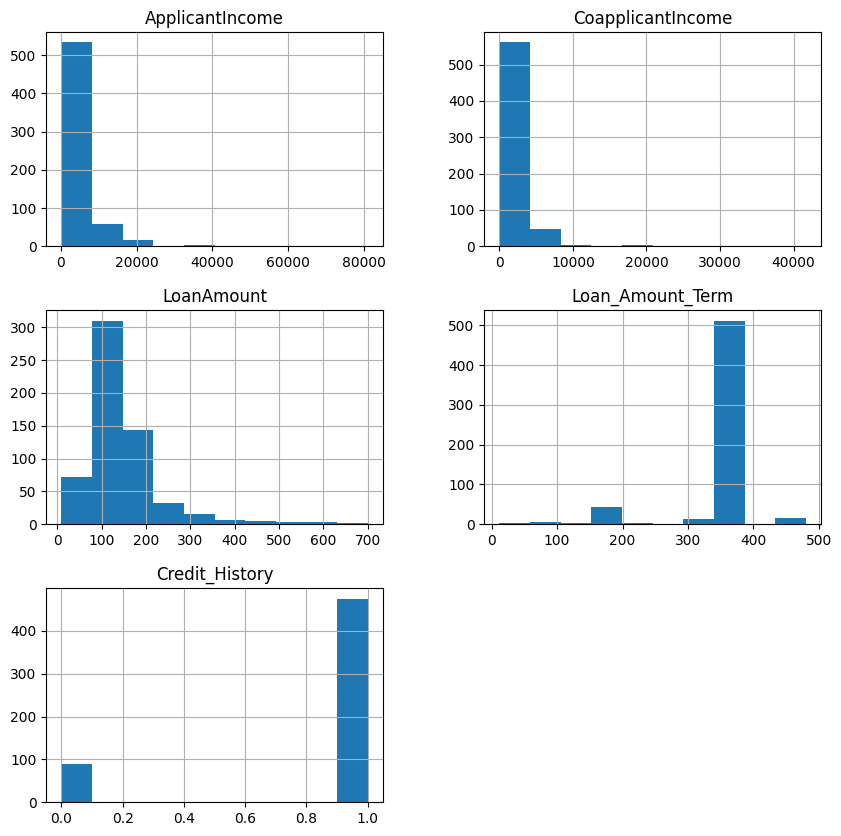

In [8]:
df.hist(figsize=(10,10))
plt.show()

In [9]:
## Data Preparation
### Dropping insignificant column-> Loan_ID
### Missing values-> Mean/Med/Mode
### Categorical -> Encoding

In [10]:
df=df.drop("Loan_ID",axis=1)

In [11]:
df.shape

(614, 12)

In [12]:
med_amount=df["LoanAmount"].median()
med_amount

128.0

In [13]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,med_amount)

In [14]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14
Credit_History,50


In [15]:
### Try for replacing loan amount term and credit history

In [16]:
med_term=df["Loan_Amount_Term"].median()
med_term

360.0

In [17]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,med_term)

In [18]:
med_credit=df["Credit_History"].median()
med_credit

1.0

In [19]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,med_credit)

In [20]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [21]:
mode_gender=df["Gender"].mode()[0]
mode_gender

'Male'

In [22]:
df["Gender"]=df["Gender"].replace(np.nan,mode_gender)

In [23]:
### Try for Married,Dependents and Self-emp

In [24]:
mode_married=df["Married"].mode()[0]
df["Married"]=df["Married"].replace(np.nan,mode_married)

In [25]:
mode_dep=df["Dependents"].mode()[0]
df["Dependents"]=df["Dependents"].replace(np.nan,mode_dep)

In [26]:
mode_emp=df["Self_Employed"].mode()[0]
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode_emp)

In [27]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [29]:
### Cat to num(Encoding)
df=pd.get_dummies(df,columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"])

In [30]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    object 
 6   Gender_Female            614 non-null    bool   
 7   Gender_Male              614 non-null    bool   
 8   Married_No               614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Dependents_0             614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Education_Graduate       6

In [32]:
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

/tmp/ipython-input-647256549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
Y=df[["Loan_Status"]]
X=df.drop("Loan_Status",axis=1)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [36]:
model_lr=LogisticRegression()

In [37]:
model_lr.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model_lr.score(X_train,Y_train)

0.8088578088578089

In [39]:
model_lr.score(X_test,Y_test)

0.8162162162162162

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [65]:
model_knn=KNeighborsClassifier(n_neighbors=9,p=1)

In [66]:
model_knn.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9, p=1)

In [67]:
model_knn.score(X_train,Y_train)

0.7062937062937062

In [68]:
model_knn.score(X_test,Y_test)

0.6756756756756757

In [69]:
model_svc=SVC(kernel="linear") #try with poly

In [70]:
model_svc.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [71]:
model_svc.score(X_train,Y_train)

0.6899766899766899

In [72]:
model_svc.score(X_test,Y_test)

0.6864864864864865

In [85]:
model_dtc=DecisionTreeClassifier(max_depth=4,min_samples_split=15)

In [86]:
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=15)

In [87]:
model_dtc.score(X_train,Y_train)

0.8251748251748252

In [88]:
model_dtc.score(X_test,Y_test)

0.8



| Algorithm          | Hyperparameter      | Typical Range                | Explanation                                                               |
| ------------------ | ------------------- | ---------------------------- | ------------------------------------------------------------------------- |
| **KNN**            | `n_neighbors`       | 1 – 50                       | Number of neighbors to consider; lower = more flexible, higher = smoother |
|                    | `weights`           | 'uniform', 'distance'        | How to weight neighbors; 'distance' gives closer points more influence    |
|                    | `p`                 | 1 (Manhattan), 2 (Euclidean) | Distance metric used in calculation                                       |
| **SVM (SVC)**      | `C`                 | 0.01 – 1000                  | Regularization; lower = more margin, higher = less misclassification      |
|                    | `kernel`            | 'linear', 'rbf', 'poly'      | Type of kernel function to transform data                                 |
|                    | `gamma`             | 'scale', 'auto', 0.001–1     | Controls the influence of individual training examples                    |
| **Decision Tree**  | `max_depth`         | 1 – None                     | Limits tree depth to avoid overfitting                                    |
|                    | `min_samples_split` | 2 – 20                       | Minimum samples required to split a node                                  |
|                    | `criterion`         | 'gini', 'entropy'            | Function used to measure the quality of a split                           |
| **Bagging**        | `n_estimators`      | 10 – 500                     | Number of base learners (e.g., trees) in the ensemble                     |
|                    | `max_samples`       | 0.5 – 1.0                    | Fraction of training data to sample per learner                           |
|                    | `bootstrap`         | True, False                  | Whether sampling is with replacement                                      |
| **AdaBoost**       | `n_estimators`      | 50 – 500                     | Number of boosting rounds                                                 |
|                    | `learning_rate`     | 0.01 – 1.0                   | Shrinks the contribution of each classifier                               |
|                    | `algorithm`         | 'SAMME', 'SAMME.R'           | SAMME.R uses probabilities; generally better performance                  |
| **Gradient Boost** | `n_estimators`      | 100 – 1000                   | Number of boosting stages to perform                                      |
|                    | `learning_rate`     | 0.01 – 0.3                   | Controls step size in updating model                                      |
|                    | `max_depth`         | 3 – 10                       | Depth of individual trees (controls complexity)                           |
| **Random Forest**  | `n_estimators`      | 100 – 1000                   | Number of decision trees                                                  |
|                    | `max_depth`         | 5 – None                     | Maximum depth of each tree                                                |
|                    | `max_features`      | 'sqrt', 'log2', None         | Number of features to consider at each split                              |




https://miro.medium.com/v2/resize:fit:1151/0*ItVKiyx2F3ZU8zV5

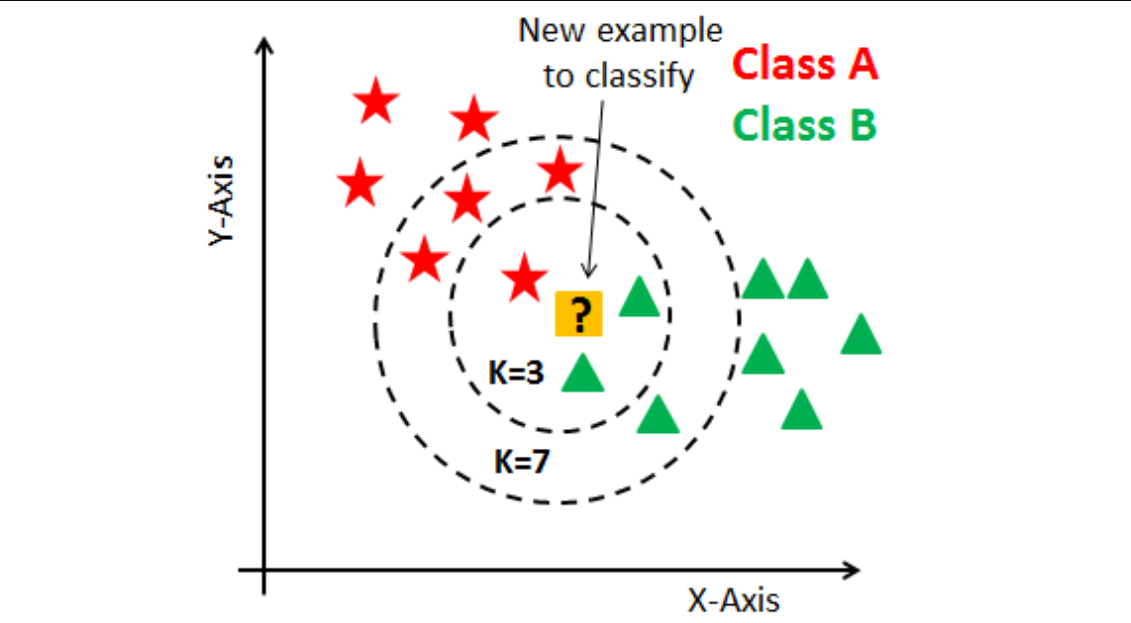

https://www.mltut.com/wp-content/uploads/2020/12/Add-a-heading-3-2048x1152.png

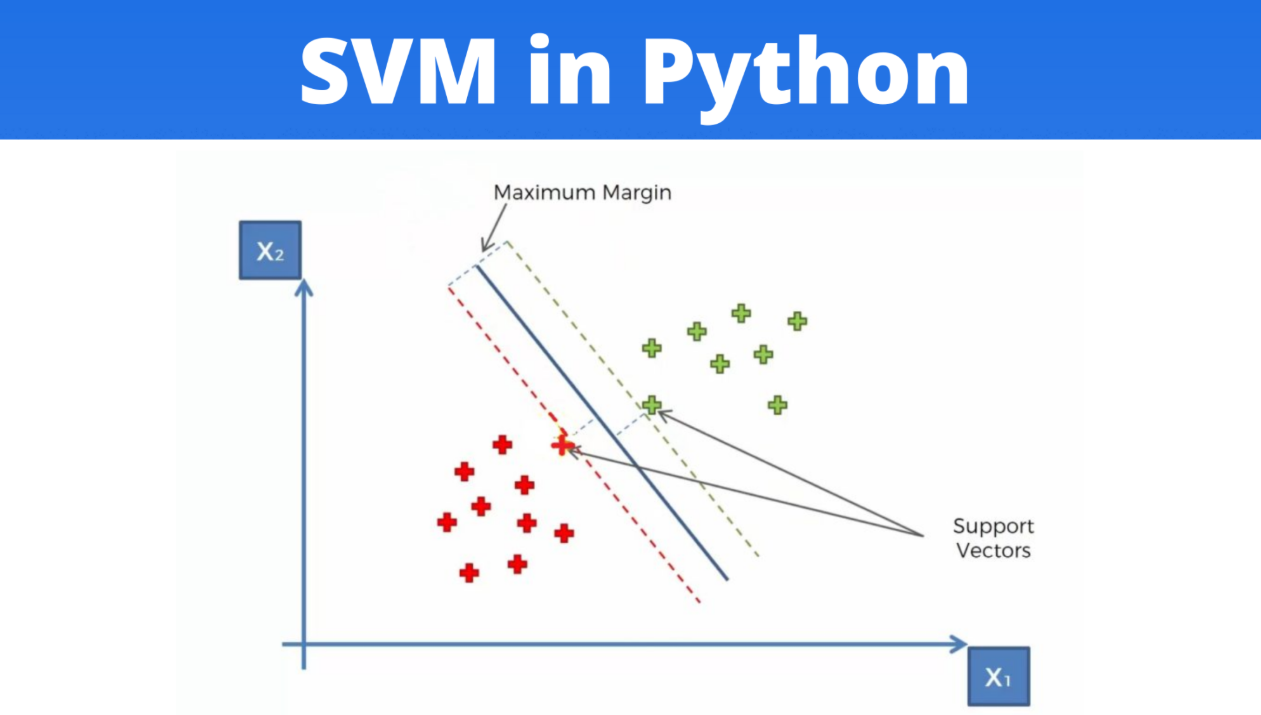

https://laujohn.com/images/decision_tree_model.png

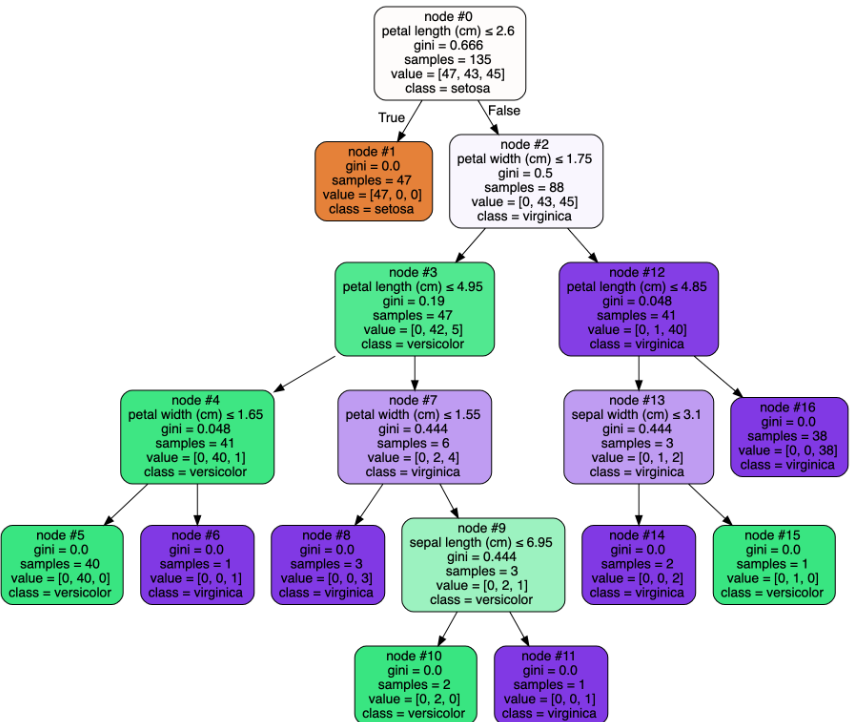

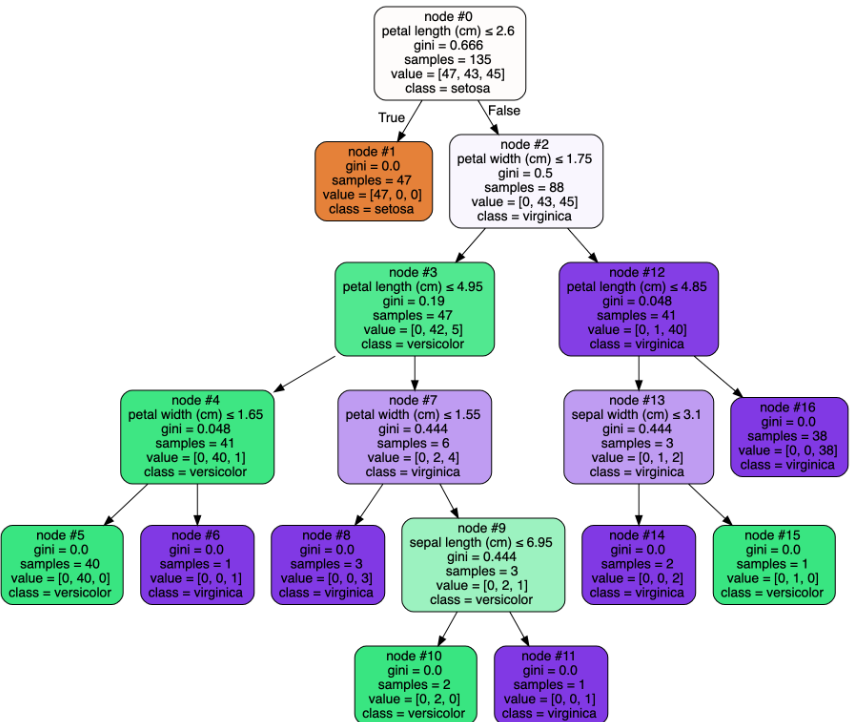

https://cdn.corporatefinanceinstitute.com/assets/bagging.png

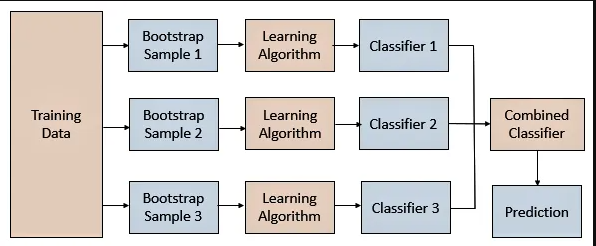

https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https://substack-post-media.s3.amazonaws.com/public/images/3ed1ed6d-2387-47f9-817e-26cfd74843ce_2667x1939.png

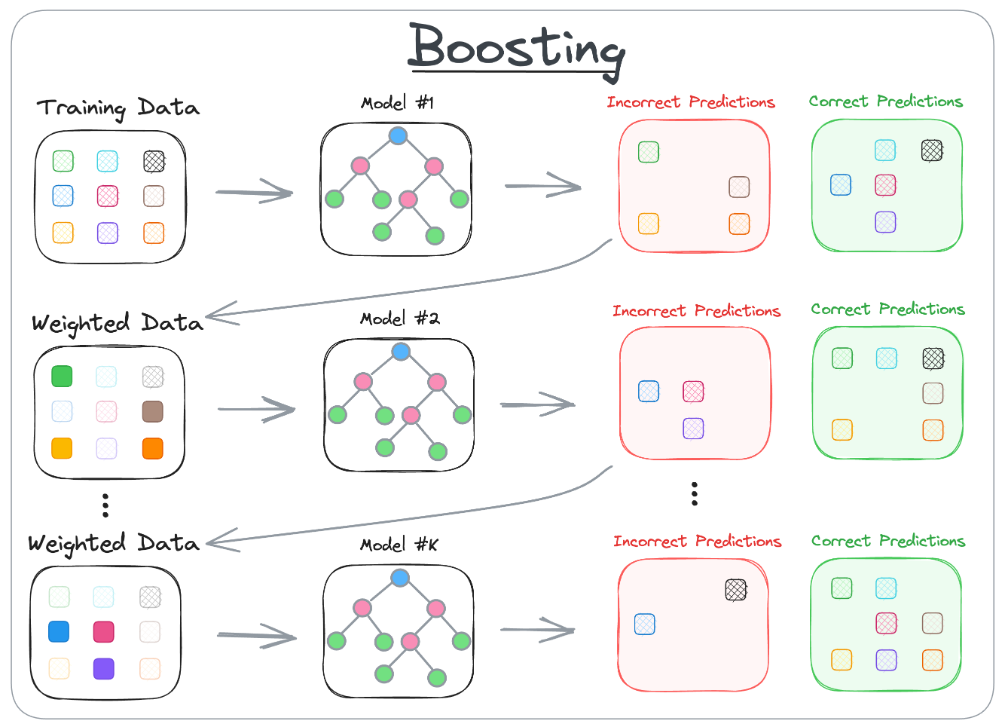

https://liorsinai.github.io/assets/posts/random-forests/Random_forest_diagram_complete.png

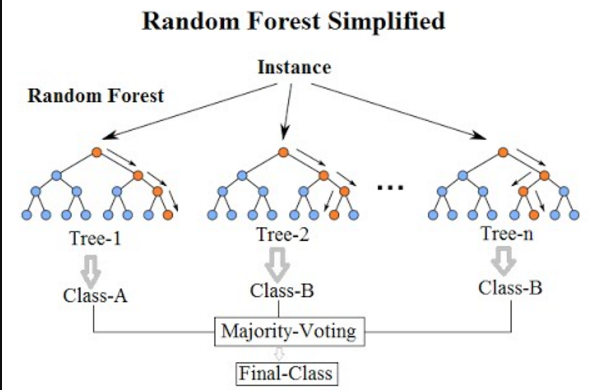